# 02.2 The Snell Envelope

<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

**Goal of this notebook**

- Introduce the **Snell envelope**, a key concept in optimal stopping theory.  
- Show how it represents the **value process** of an optimal stopping problem.  
- Derive its recursive formulation in discrete time.  
- Illustrate the computation with a simple numerical example in Python.  
- Prepare the ground for the next step: pricing American options as Snell envelopes.

**This notebook**

Contains a theoretical introduction to the Snell envelope, its recursive backward computation algorithm, and two numerical examples: a deterministic payoff illustration and a stochastic binomial process simulation. It demonstrates how the envelope dominates the payoff process and identifies optimal stopping times through dynamic programming.

# 1. Theoretical Framework

Let $(Z_n)_{0 \le n \le N}$ be an **adapted process** (e.g. a payoff observable at each date).

We consider the problem of finding the **optimal stopping time** $\tau^*$ that maximizes the expected reward:

$$
V_0 = \sup_{\tau \in \mathcal{T}} \mathbb{E}[ Z_\tau ].
$$

Directly searching over all stopping times is complex.  
Instead, we construct the **Snell envelope**, which allows a *recursive* computation of this value.

### Definition (Snell Envelope)

The **Snell envelope** $(U_n)_{0 \le n \le N}$ of a process $Z$ is defined by:

$$
U_N = Z_N, \quad
U_n = \max \left( Z_n, \; \mathbb{E}[ U_{n+1} \mid \mathcal{F}_n ] \right), \quad n = N-1, \dots, 0.
$$

With:
- $U_n$ = best expected reward from time n onward,  
    if we can choose when to stop based on future evolution of $Z$.
- $U$ is the *smallest supermartingale* dominating $Z$.

# 2. Intuition and Connection to Decision Making

At each time $n$:
- $Z_n$: the value of **stopping now**,  
- $\mathbb{E}[U_{n+1} \mid \mathcal{F}_n]$: the value of **waiting**.

Hence:
- If $Z_n \ge \mathbb{E}[U_{n+1} \mid \mathcal{F}_n]$: stop now.  
- Otherwise: continue.

The rule "stop when $Z_n = U_n$" defines the **optimal stopping time** $\tau^*$.

# 3. Numerical Example (Deterministic Dynamics)

Let's consider a simple three-step model where $Z_n$ is known in advance  
(just for illustration of the recursion):

In [1]:
import numpy as np
import pandas as pd

# Payoff process (example)
Z = np.array([3.0, 2.0, 6.0, 5.0])
N = len(Z) - 1

U = np.zeros_like(Z)
U[N] = Z[N]

# Recursive backward computation
for n in range(N-1, -1, -1):
    U[n] = max(Z[n], np.mean(U[n+1]))  # E[U_{n+1}] simplified as mean
    print(f"n={n}: U_n = {U[n]:.2f}")

pd.DataFrame({"Z_n": Z, "U_n": U})

n=2: U_n = 6.00
n=1: U_n = 6.00
n=0: U_n = 6.00


,Z_n,U_n
0,3.0,6.0
1,2.0,6.0
2,6.0,6.0
3,5.0,5.0


# 4. Stochastic Example (Random Process)

We now simulate a random payoff process $Z_n = \max(S_n, 0)$ where $S_n$ follows a binomial random walk.

We compute the Snell envelope by backward induction.


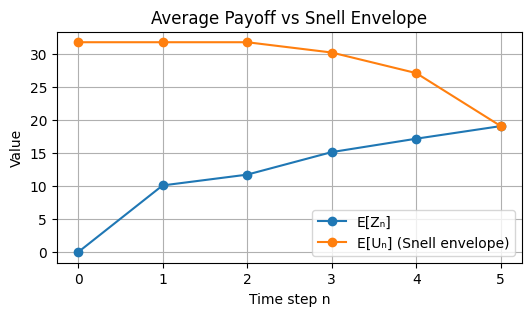

In [2]:
import matplotlib.pyplot as plt

np.random.seed(1)
N = 5
M = 1000  # number of simulations
u, d = 1.2, 0.8
S0 = 100

# Simulate price tree (binomial paths)
S = np.zeros((M, N+1))
S[:, 0] = S0
for n in range(N):
    S[:, n+1] = S[:, n] * np.where(np.random.rand(M) < 0.5, u, d)

# Define payoff process (for instance, max(100 - S, 0))
Z = np.maximum(100 - S, 0)

# Backward computation of Snell envelope
U = np.zeros_like(Z)
U[:, -1] = Z[:, -1]
for n in range(N-1, -1, -1):
    U[:, n] = np.maximum(Z[:, n], np.mean(U[:, n+1]))  # conditional expectation simplified

# Mean envelope over simulations
U_mean = U.mean(axis=0)
Z_mean = Z.mean(axis=0)

plt.figure(figsize=(6,3))
plt.plot(Z_mean, '-o', label='E[Zₙ]')
plt.plot(U_mean, '-o', label='E[Uₙ] (Snell envelope)')
plt.title("Average Payoff vs Snell Envelope")
plt.xlabel("Time step n")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


### Notes on outputs: 

The Snell envelope dominates the payoff process $Z_n$ at every time step.
It represents the best achievable value if one can stop optimally.

From the graph:

- $U_n$ stays above $Z_n$ — since it always reflects the better of "stop" or "wait."

- The envelope is flat where waiting is optimal (supermartingale property).

- Where $Z_n$ touches $U_n$, stopping becomes optimal.

This recursive structure is the mathematical foundation of dynamic programming
and will directly lead to the pricing of American options.

- The Snell envelope formalizes the value of an optimal stopping problem.

- It is the smallest supermartingale dominating the reward process.

- Its recursive definition provides a practical algorithm for computing $V_0$. 

- The optimal stopping time is given by: 
    $$\tau^* = \inf\{n : Z_n = U_n\}.$$
